In [ ]:
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
# To get functions to plot the band structure and hamiltonian
sys.path.append("../../../")
sns.set()

In [3]:
# DMRG Reference values
DMRGIP = -6.39
DMRGEA = 2.54

In [4]:
dpi = 200

plt.rcParams.update({
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'axes.labelsize': 28,
    'figure.dpi': dpi,
    'axes.grid': True,
    'grid.linestyle': '--',
    'figure.figsize':(16,10)
})

In [5]:
def get_homo_band_dft(pklfile):
    with open(pklfile, "rb") as f:
        data = pickle.load(f)
    homo_e, homo_k = data['homo_e'], data['homo_k']
    return  homo_e, homo_k

def get_lumo_band_dft(pklfile):
    with open(pklfile, "rb") as f:
        data = pickle.load(f)
    lumo_e, lumo_k = data['lumo_e'], data['lumo_k']
    return lumo_e, lumo_k

get_homo = get_homo_band_dft
get_lumo = get_lumo_band_dft

# PBE, PBE0, HSE06, HF Band Structure

In [8]:
def plot_dft_bands(XC='PBE'):
    plt.figure()

    # (2H, 16)
    pklfile = f'./hchain.{XC}.2.pkl'
    homo_e, homo_k = get_homo(pklfile)
    lumo_e, lumo_k = get_lumo(pklfile)
    plt.scatter(homo_k, homo_e, label=f"{XC} VB (2H)", color='#0072B2', marker='o', s=150)  
    plt.scatter(lumo_k, lumo_e, label=f"{XC} CB (2H)", color='#FF6347', marker='o', s=150)  

    # (4H, 16)
    pklfile = f'./hchain.{XC}.4.pkl'
    homo_e, homo_k = get_homo(pklfile)
    lumo_e, lumo_k = get_lumo(pklfile)
    plt.scatter(homo_k, homo_e, label=f"{XC} VB (4H)", color='#9B59B6', marker='^',  s=150)  
    plt.scatter(lumo_k, lumo_e, label=f"{XC} CB (4H)", color='#2ECC71', marker='^',  s=150)  

    # DMRG Reference Data.
    plt.axhline(y=DMRGIP, color='blue', linestyle='--', linewidth=2, label='DMRG IP(32H)')
    plt.axhline(y=DMRGEA, color='red',  linestyle='--', linewidth=2, label='DMRG EA(32H)')

    plt.xlabel(r"$kd/2\pi}$")
    plt.ylabel("Energy (eV)")
    plt.ylim(-15, 18)
    plt.xticks()
    plt.yticks()
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.22), ncol=3,frameon=True, fontsize=28)
    plt.tight_layout()
    return plt

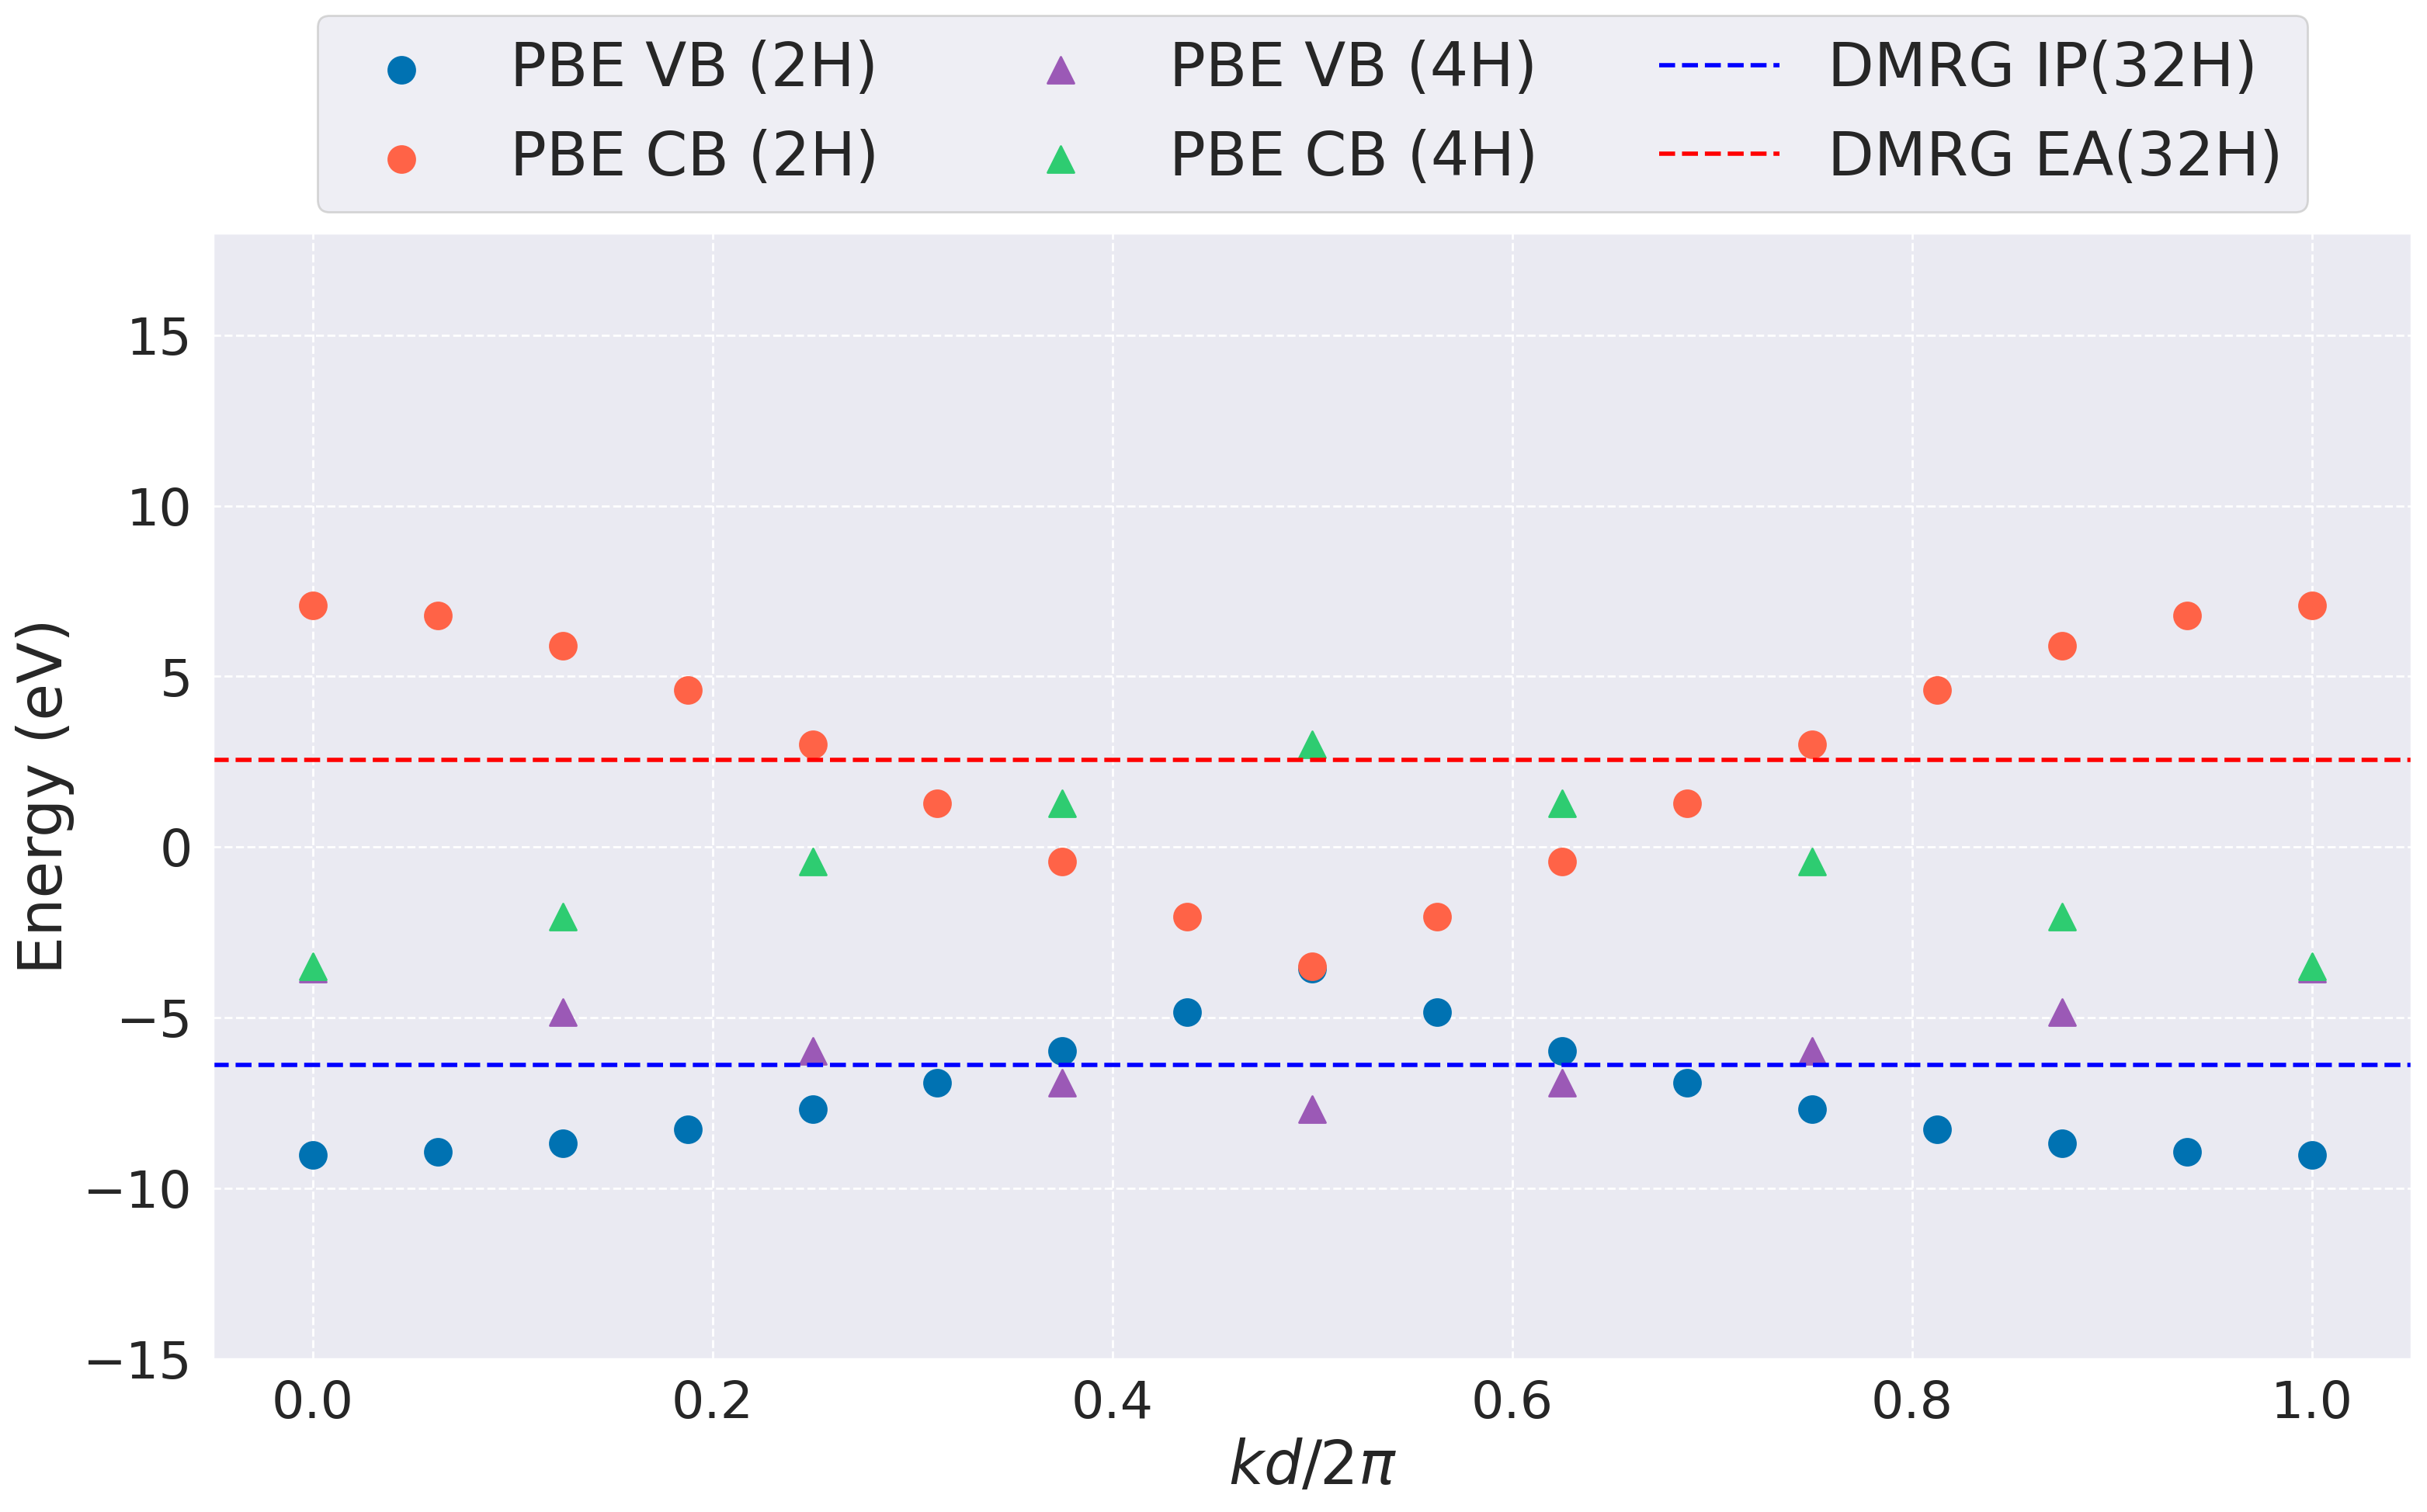

In [9]:
pltPBE = plot_dft_bands(XC='PBE')
pltPBE.savefig('PBEHChainBandStructure.png', dpi=dpi)

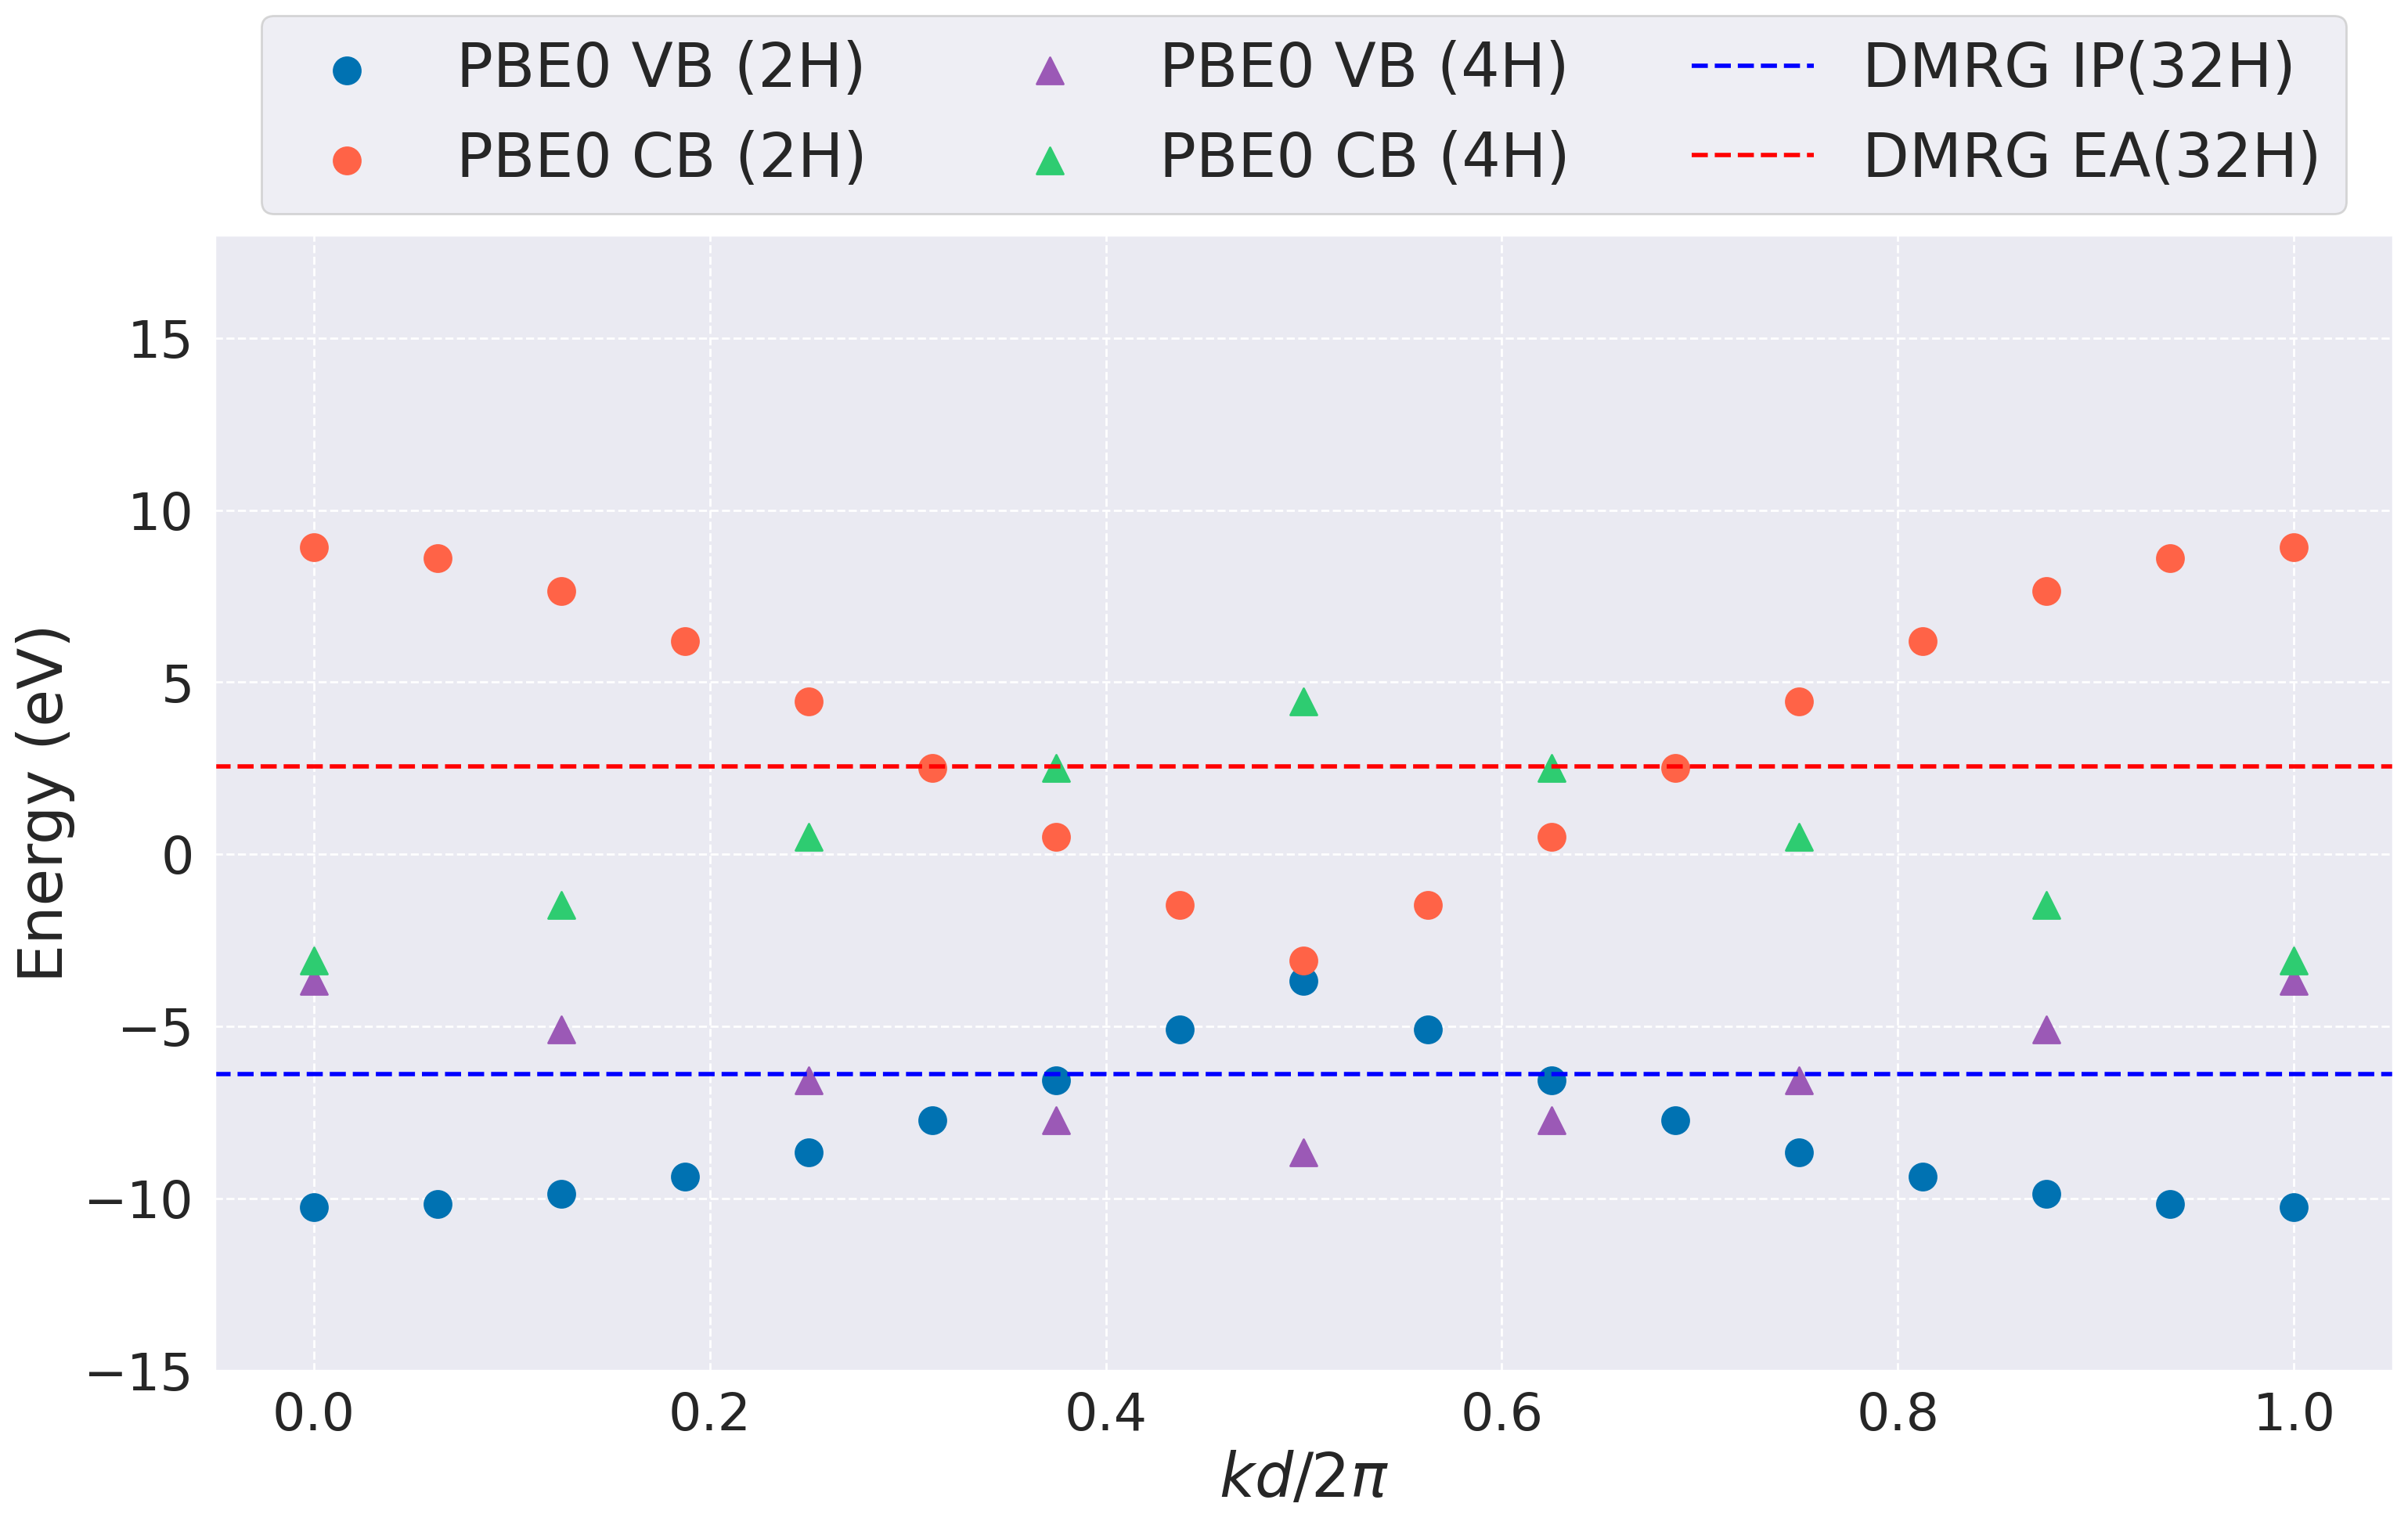

In [10]:
pltPBE0 = plot_dft_bands(XC='PBE0')
pltPBE0.savefig('PBE0HChainBandStructure.png', dpi=dpi)

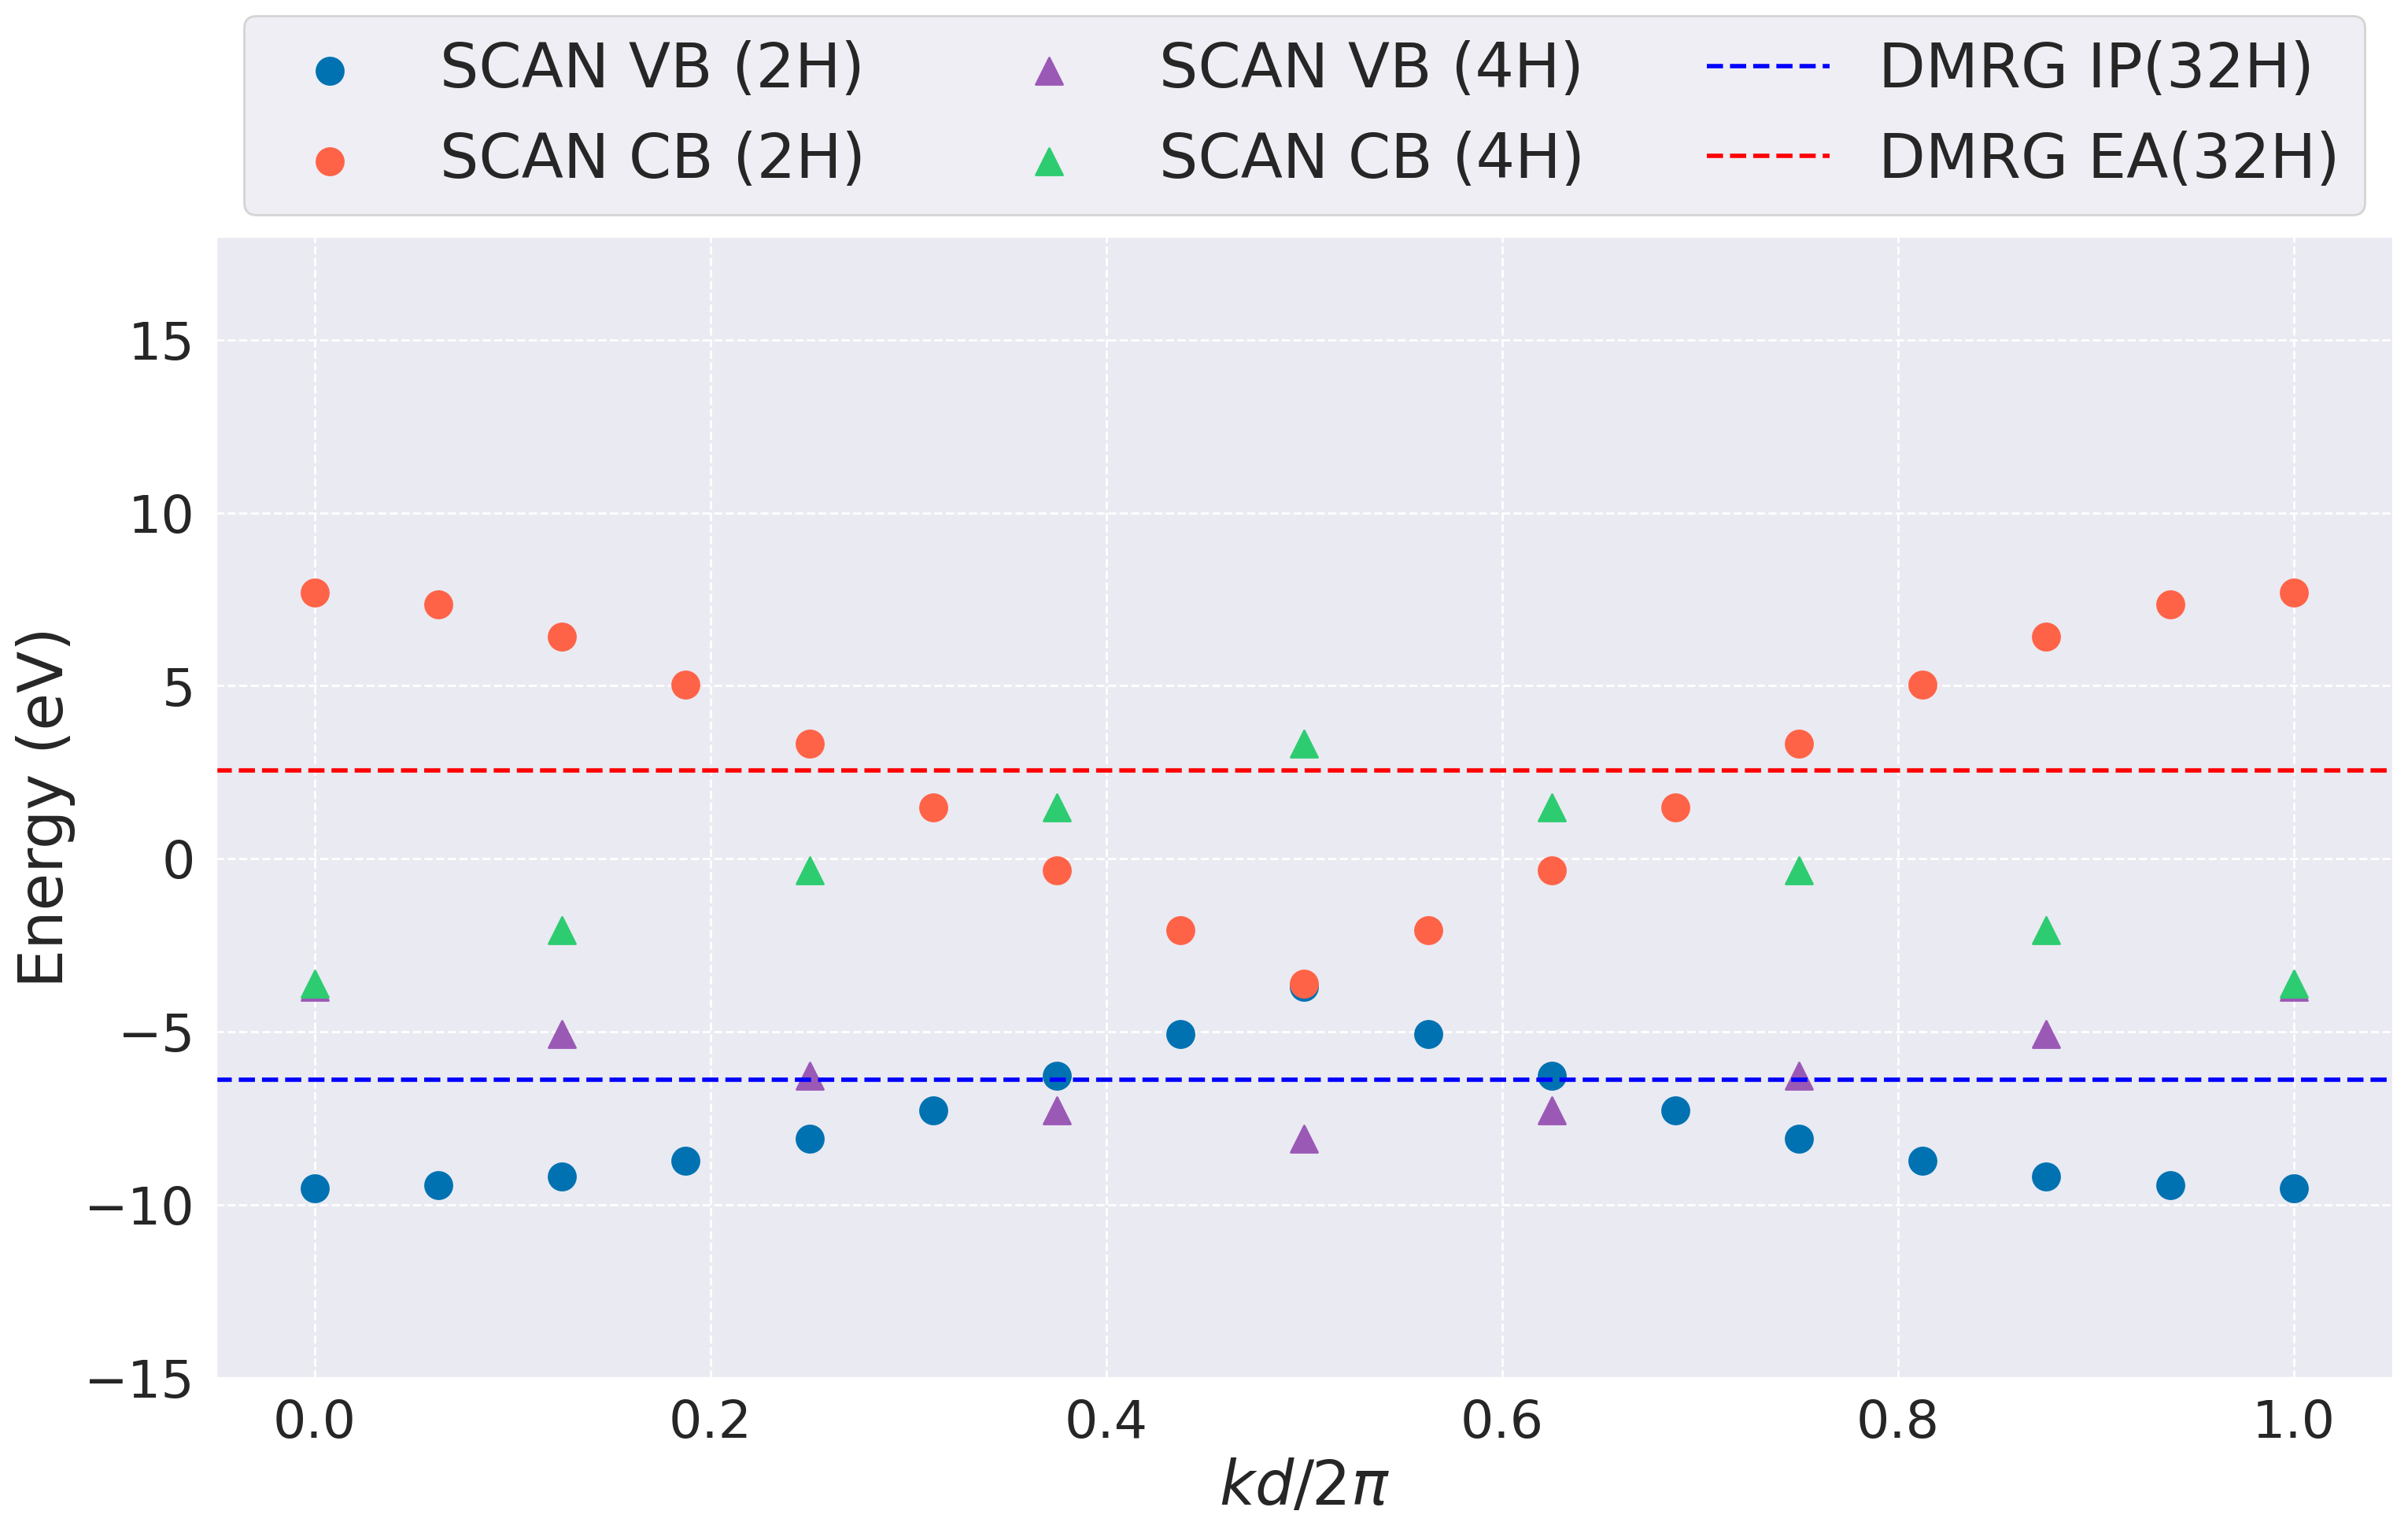

In [11]:
pltSCAN = plot_dft_bands(XC='SCAN')
pltSCAN.savefig('SCANHChainBandStructure.png', dpi=dpi)

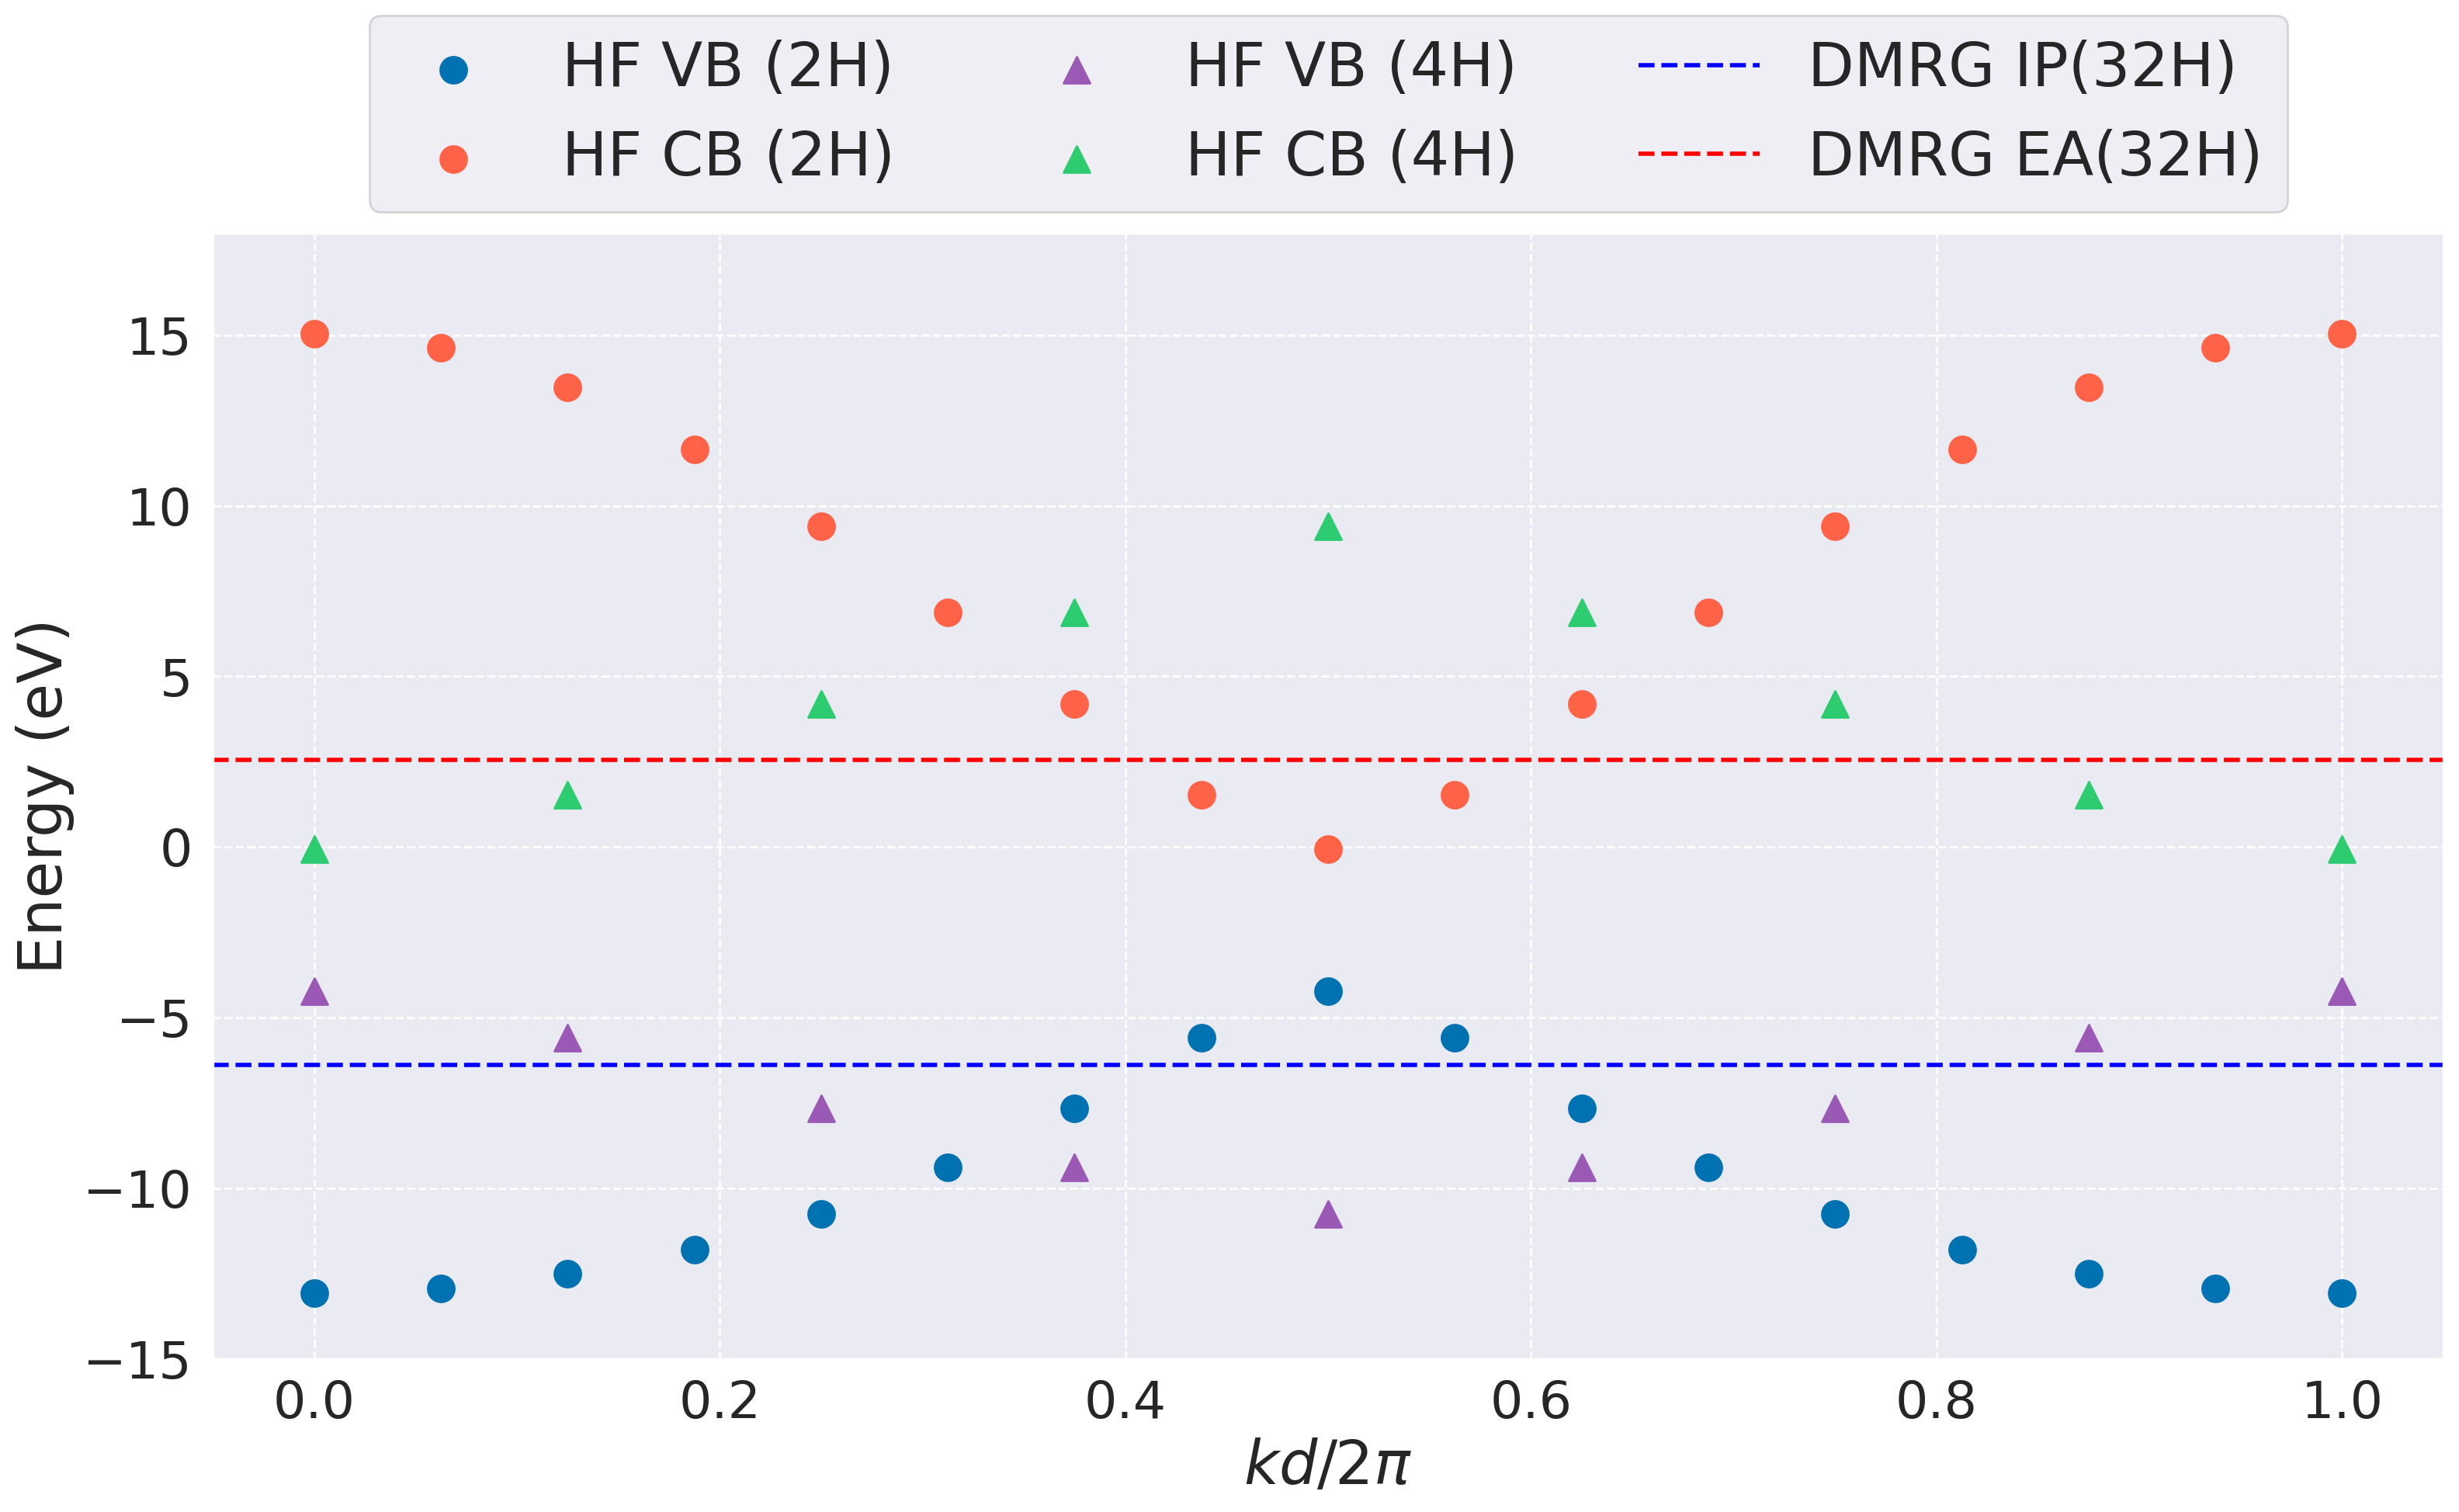

In [12]:
pltHF = plot_dft_bands(XC='HF')
pltHF.savefig('HFHChainBandStructure.png', dpi=dpi)